In [115]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading data from storage location
df=pd.read_csv("C:\\\\dataMining\\7.15_Motor_Vehicle_Accidents_during_1971_by_Primary_Cause_of_Accidents.csv")

#replacing all non numerical values(garbage) to null values(Data Cleaning)
df=df.replace(to_replace ="@",value ="NaN")
df=df.replace(to_replace ="*",value ="NaN")

#dropping columns and rows respectively with excess null values(Data Reduction)
df=df.dropna(thresh=len(df)-3,axis=1)
df=df.dropna(axis=0, how='any', thresh=10, subset=None, inplace=False)

#filling null values in particular column with suitable central tendency measure
df=df.fillna(df.mean(),inplace=False)
df

,Category (Col. 1),State/ Union Territory (Col. 2),Total (Col. 3),Fault of driver of M.V. (Col. 4),Fault of driver of Veh. Other than a M.V. (Col. 5),Fault of cyclist (Col. 6),Fault of Pedestrians (Col. 7),Fault of Passengers (Col. 8),Defect in mechanical condition of M.V. (Col. 9),Defective road surface (Col. 10),Bad weather conditions (Col. 11),Other causes (Col. 12),Causes not known (Col. 13)
0,State,Andhra Pradesh,3565,2086,53,230.0,392.0,65,201.0,23.0,14.000000,428,73
1,State,Assam,691,389,65,29.0,43.0,17,34.0,17.0,1.000000,46,50
2,State,Bihar,4062,1839,548,199.0,403.0,190,221.0,65.0,60.000000,261,276
3,State,Gujarat,4194,2978,117,240.0,365.0,18,214.0,23.0,20.000000,192,27
4,State,Jammu & Kashmir,528,249,25,8.0,21.0,4,59.0,5.0,5.000000,81,71
5,State,Kerala,4319,2944,79,165.0,361.0,72,240.0,98.0,67.000000,159,134
6,State,Maharashtra,40793,7449,1939,1221.0,5202.0,150,1187.0,350.0,451.000000,2991,1853
7,State,Mysore,5679,4613,250,55.0,183.0,48,224.0,26.0,15.000000,171,94
8,Union Territory,Pondicherry,184,76,12,9.0,38.0,5,3.0,63.2,63.909091,14,27
9,Union Territory,"Goa, Daman & Diu",837,357,59,32.0,82.0,16,95.0,20.0,58.000000,110,8


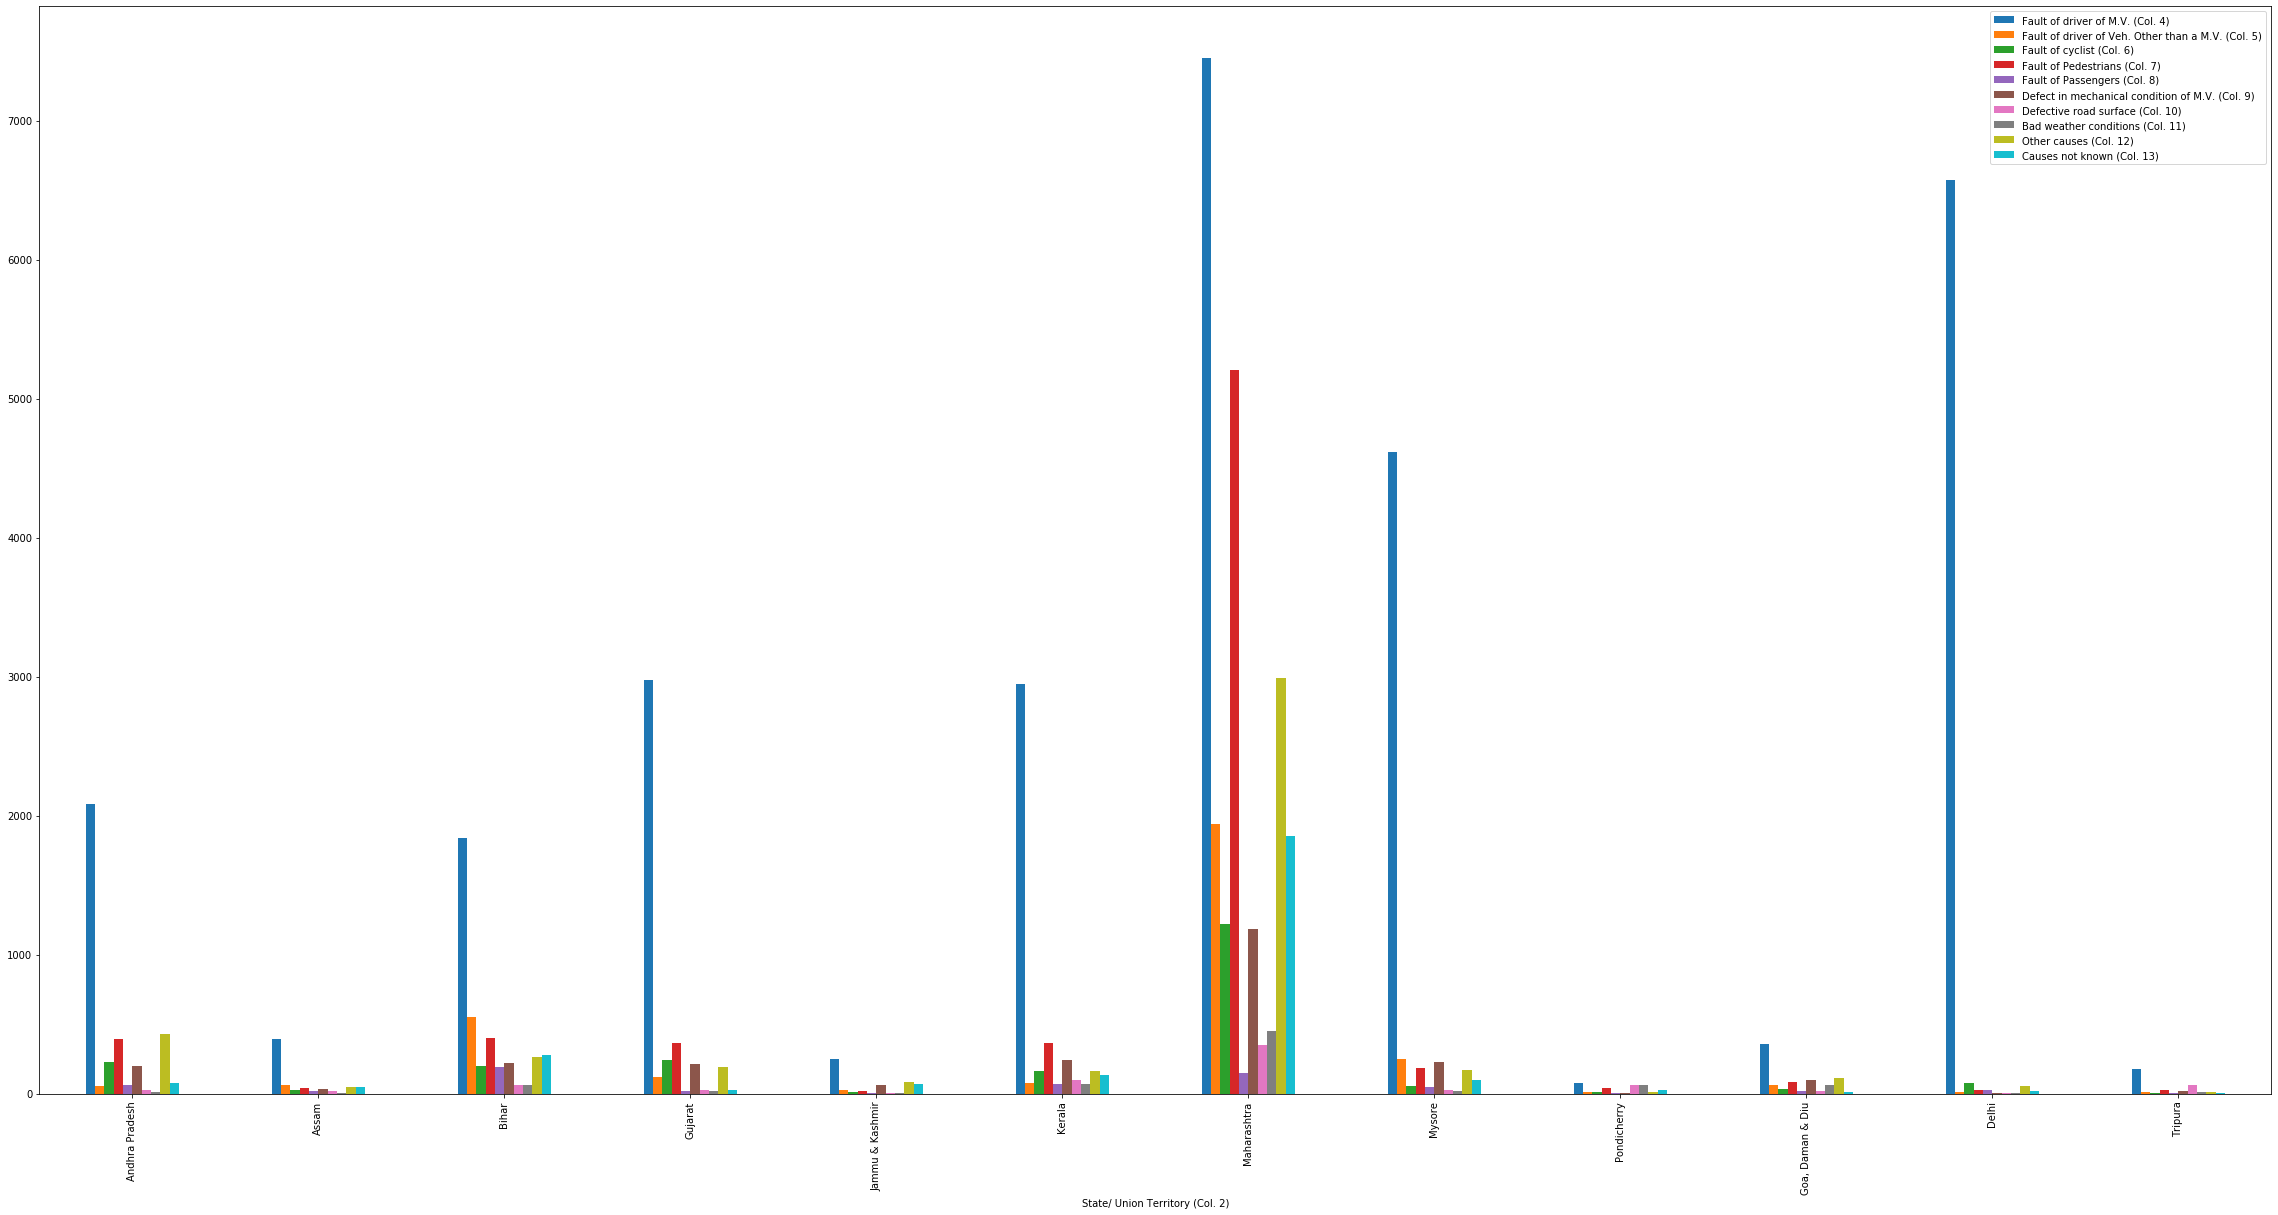

In [116]:
#deleting a noisy column for beter visualisation of a data
del df['Total (Col. 3)']

#setting proper index for graph
df.set_index("State/ Union Territory (Col. 2)",inplace=True)

#plotting a suitable graph according to data
df.plot.bar(stacked=False,figsize=(40,20))
plt.show()

In [117]:
#Merging couple of columns for data classification
df['Fault of driver of M.V. (Col. 4)']=df['Fault of driver of M.V. (Col. 4)']+df['Fault of driver of Veh. Other than a M.V. (Col. 5)']
df['Fault of driver of Veh. Other than a M.V. (Col. 5)']=df['Fault of cyclist (Col. 6)']+df['Fault of Pedestrians (Col. 7)']+df['Fault of Passengers (Col. 8)']+df['Defect in mechanical condition of M.V. (Col. 9)']+df['Defective road surface (Col. 10)']+df['Bad weather conditions (Col. 11)']+df['Other causes (Col. 12)']
#Renaming
df=df.rename(columns = {"Fault of driver of M.V. (Col. 4)":"Driver Fault"})
df=df.rename(columns = {"Fault of driver of Veh. Other than a M.V. (Col. 5)":"Not the fault of driver"})
df=df.rename(columns = {"Causes not known (Col. 13)":"Causes not known"})
#Deleting columns unncessary for data classification
del df['Fault of cyclist (Col. 6)']
del df['Category (Col. 1)']
del df['Fault of Pedestrians (Col. 7)']
del df['Fault of Passengers (Col. 8)']
del df['Defect in mechanical condition of M.V. (Col. 9)']
del df['Defective road surface (Col. 10)']
del df['Bad weather conditions (Col. 11)']
del df['Other causes (Col. 12)']
df

,Driver Fault,Not the fault of driver,Causes not known
State/ Union Territory (Col. 2),,,
Andhra Pradesh,2139,1353.000000,73
Assam,454,187.000000,50
Bihar,2387,1399.000000,276
Gujarat,3095,1072.000000,27
Jammu & Kashmir,274,183.000000,71
Kerala,3023,1162.000000,134
Maharashtra,9388,11552.000000,1853
Mysore,4863,722.000000,94
Pondicherry,88,196.109091,27


In [118]:
#Data classification
# 1 means more than 50% of accidents are because of the fault of drivers
# 0 means less than 50% of accidents are because of the fault of drivers
df['Category']=""
df

,Driver Fault,Not the fault of driver,Causes not known,Category
State/ Union Territory (Col. 2),,,,
Andhra Pradesh,2139,1353.000000,73,
Assam,454,187.000000,50,
Bihar,2387,1399.000000,276,
Gujarat,3095,1072.000000,27,
Jammu & Kashmir,274,183.000000,71,
Kerala,3023,1162.000000,134,
Maharashtra,9388,11552.000000,1853,
Mysore,4863,722.000000,94,
Pondicherry,88,196.109091,27,


In [119]:
df['Category']=np.where(df['Driver Fault']>df['Not the fault of driver'],1,0)
df

,Driver Fault,Not the fault of driver,Causes not known,Category
State/ Union Territory (Col. 2),,,,
Andhra Pradesh,2139,1353.000000,73,1
Assam,454,187.000000,50,1
Bihar,2387,1399.000000,276,1
Gujarat,3095,1072.000000,27,1
Jammu & Kashmir,274,183.000000,71,1
Kerala,3023,1162.000000,134,1
Maharashtra,9388,11552.000000,1853,0
Mysore,4863,722.000000,94,1
Pondicherry,88,196.109091,27,0
